Note: I made some progress on this but ran out of time to finish it properly

/home/aswart/Documents/schoolwork/phys416/phys416code/hw2/Notebooks/exD.py:38: RuntimeWarning: invalid value encountered in double_scalars
  temp_product *= (xi - x[j]) / (x[i] - x[j])


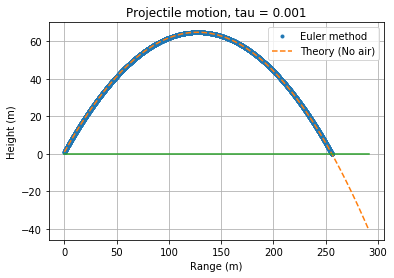

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb  5 17:23:07 2020

@author: akswa
"""

import matplotlib.pyplot as plt
import numpy as np
from exD import interpf_mod # Import interpolation function from last assignment

# balle - Program to compute the trajectory of a baseball
#         using the midpoint method. Note, this is modified from hw2_ex5.py


def balle(theta = 45,tau = .001, plot_trajectory = True,  airFlag = False, verbose = False):
    
    
    # Set initial values
    y1 = 1.0
    speed = 50.0
    #theta = 45.0

        
        
    r1 = np.array([0.0, y1])     # Initial vector position    
    v1 = np.array([[speed*np.cos(theta*np.pi/180)], [speed*np.sin(theta*np.pi/180)]])  # Initial velocity
    r = np.copy(r1)
    v = np.copy(v1)  # Set initial position and velocity, best to copy to avoid overwrites
    
    #* Set physical parameters (mass, Cd, etc.)
    Cd   = 0.35    # Drag coefficient (dimensionless)
    area = 4.3e-3  # Cross-sectional area of projectile (m^2)
    grav = 9.81    # Gravitational acceleration (m/s^2)
    mass = 0.145   # Mass of projectile (kg)
    
    
    if not airFlag:
        rho = 0      # No air resistance
    else: 
        rho = 1.2    # Density of air (kg/m^3)
    
    air_const = -0.5*Cd*rho*area/mass  # Air resistance constant
    
    #* Loop until velocity falls below threshold or max steps completed or bounces specified number of times
    
    maxstep = 8236   # Maximum number of steps
    for istep in range(0,maxstep):
        #* Record position (computed and theoretical) for plotting
        t = (istep)*tau     # Current time
        if(istep ==0):
            xplot = [r[0]]   # Record trajectory for plot
            yplot = [r[1]]
            xNoAir = [r[0]]
            yNoAir = [r[1]]
            time = [t]
            velocity = np.array(v)
        else:
            xplot.append(r[0,0])   # Record trajectory for plot
            yplot.append(r[0,1])
            xNoAir.append(r1[0] + v1[0]*t)   # Record trajectory for plot
            yNoAir.append(r1[1] + v1[1]*t - 0.5*grav*t**2)   
             
        #* Calculate the acceleration of the ball 
        accel = air_const*np.linalg.norm(v)*v   # Air resistance
        accel[1] = accel[1]-grav      # Gravity
    
        #* Calculate the new position and velocity using Midpoint method
        v_new = v + tau*accel # Midpoint method
        r = r + (tau/2)*(v+v_new).T 
        v = v_new 
            
        time.append(t)
        velocity = np.concatenate((velocity,v),axis=1)
        #* If ball reaches ground (y<0), break out of the loop
        if( r[0,1] < 0 ):
            #print(r)
            
            # Find interpolated bounce points
            x0 = interpf_mod(0,[yplot[-1],r[0,1]],[xplot[-1],r[0,0]])
            t0 = interpf_mod(0, [yplot[-1],r[0,1]], time[-2:])
            v0_y = -interpf_mod(0, [yplot[-1],r[0,1]],velocity[1,-2:]) # Interpolated y-value is negative since the ball bounces
            v0_x = interpf_mod(0, [yplot[-1],r[0,1]],velocity[0,-2:])
            r[0] = [x0,0]
            # Add interpolated bounce point to arrays
            #xplot.append(x0)   # Record trajectory for plot
            #yplot.append(0.0)
            time[-1] = t0
            velocity[0,-1] = v0_x
            velocity[1,-1] = v0_y            
            
    # Once the ball reaches the ground, interpolate the last 3 points to find accurate endpoints
    x_end = interpf_mod(0,yplot[-3:],xplot[-3:]) # Note use interpf
    t_end = interpf_mod(0,yplot[-3:],time[-3:])    
    
    if verbose:
        # Print maximum range and time of flight
        print('Maximum range is ',x_end,' meters')
        print('Time of flight is ',t_end,' seconds')
    
    if plot_trajectory:
        # Graph the trajectory of the baseball
        plt.figure(0)
        # Mark the location of the ground by a straight line
        xground = np.array([0, np.max(xNoAir)])
        yground = np.array([0, 0])
        # Plot the computed trajectory and parabolic, no-air curve
        plt.plot(xplot,yplot,'.')
        plt.plot(xNoAir,yNoAir,'--')
        plt.plot(xground,yground,'-')
        plt.legend(['Euler method','Theory (No air)'])
        plt.xlabel('Range (m)');  plt.ylabel('Height (m)')
        plt.title('Projectile motion, tau = %s' % tau)
        #axis equal; shg; # reset the aspect ratio, bring the plot to the front
        plt.grid(True)
        plt.show()

    
    
    return velocity,x_end,t_end
    
    
if __name__ == '__main__':
    v,x,t = balle()
